##### 1 Análsis de Componentes Principales

In [1]:
# Cargamos las librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargamos la base de datos
df = pd.read_csv('Cereals.csv')
df.info()
df.head()
#df.describe().round(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     76 non-null     float64
 9   sugars    76 non-null     float64
 10  potass    75 non-null     float64
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(7), int64(6), object(3)
memory usage: 9.8+ KB


,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912
4,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.0,0.75,34.384843


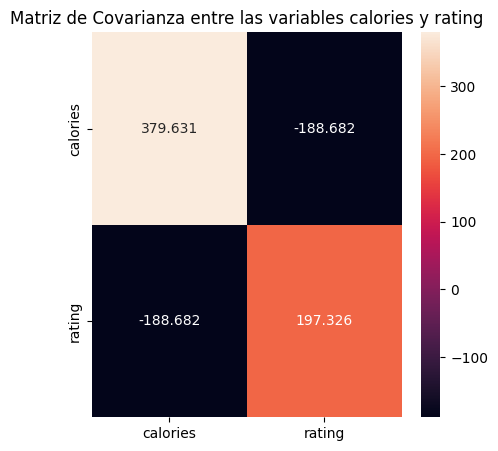

In [2]:
#Calculamos la matriz de covarianza entre las variables de interes calories y rating
cov_matrix = df[['calories', 'rating']].cov()
cov_matrix
#Guardamos la matriz de covarianza en una imagen
plt.figure(figsize=(5,5))
sns.heatmap(cov_matrix, annot=True, fmt='g')
plt.title('Matriz de Covarianza entre las variables calories y rating')
plt.savefig('cov_matrix.png')
plt.show()


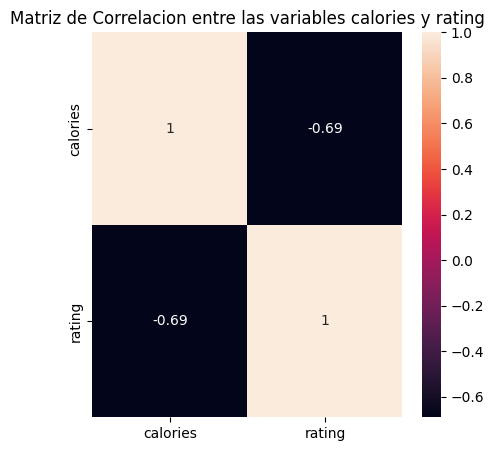

In [3]:
#Calculamos la matriz de correlacion entre las variables de interes calories y rating
cor_matrix = df[['calories', 'rating']].corr().round(2)
cor_matrix
#Guardamos la matriz de correlacion en una imagen
plt.figure(figsize=(5,5))
sns.heatmap(cor_matrix, annot=True, fmt='g')
plt.title('Matriz de Correlacion entre las variables calories y rating')
plt.savefig('cor_matrix.png')
plt.show()

Text(0.5, 1.0, 'Diagrama de dispersión entre calories y rating')

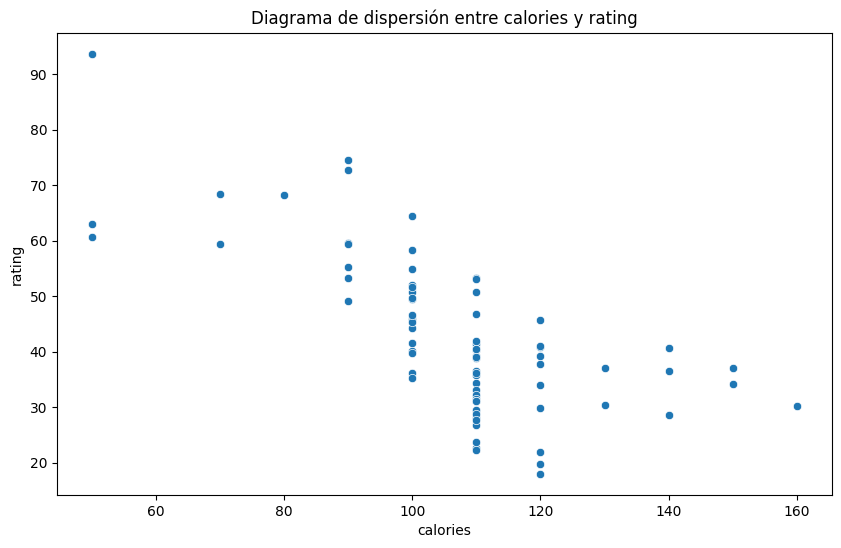

In [4]:
# Diagrama de dispersión entre las variables de interes calories y rating

plt.figure(figsize=(10, 6))
sns.scatterplot(x='calories', y='rating', data=df)
plt.title('Diagrama de dispersión entre calories y rating')

In [ ]:
#Calculamos el PCA
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA


# Crear un DataFrame
cereals_df = pd.DataFrame(df)

# Aplicar PCA a las dos variables
pca = PCA(n_components=2)
pcs = pca.fit(cereals_df[['calories', 'rating']])

# Mostrar resumen de la varianza explicada
print("Varianza explicada por cada componente principal:")
print(pca.explained_variance_ratio_)

# Matriz de rotación (componentes principales)
print("\nMatriz de rotación:")
print(pca.components_)

# Obtener los scores de los primeros 5 datos
scores = pca.transform(cereals_df[['calories', 'rating']])
print("\nPrimeras 5 filas de los scores:")
print(scores[:5])

Varianza explicada por cada componente principal:
[0.86319135 0.13680865]

Matriz de rotación:
[[ 0.84705348 -0.53150766]
 [ 0.53150766  0.84705348]]

Primeras 5 filas de los scores:
[[-44.92152782   2.19718326]
 [ 15.72526488  -0.38241646]
 [-40.14993478  -5.40721229]
 [-75.31077196  12.99912556]
 [  7.04150831  -5.35768573]]


In [6]:
#Ahora realizamos el PCA para todas las variables numericas
# las variables numericas son
cereals_df2 = pd.DataFrame(df)
#cereals_df.info()
cereals_df2 = cereals_df2.drop(['name', 'mfr', 'type'], axis=1)
cereals_df2 = cereals_df2.dropna()
cereals_df2 = cereals_df2.drop_duplicates()
cereals_df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 74 entries, 0 to 76
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calories  74 non-null     int64  
 1   protein   74 non-null     int64  
 2   fat       74 non-null     int64  
 3   sodium    74 non-null     int64  
 4   fiber     74 non-null     float64
 5   carbo     74 non-null     float64
 6   sugars    74 non-null     float64
 7   potass    74 non-null     float64
 8   vitamins  74 non-null     int64  
 9   shelf     74 non-null     int64  
 10  weight    74 non-null     float64
 11  cups      74 non-null     float64
 12  rating    74 non-null     float64
dtypes: float64(7), int64(6)
memory usage: 8.1 KB


Varianza explicada por cada componente principal:
[5.39502578e-01 3.86674049e-01 3.94252505e-02 2.82906051e-02
 5.45550568e-03 3.36406466e-04 2.22065532e-04 4.67369240e-05
 3.32742825e-05 1.05508115e-05 2.67276286e-06 3.05401440e-07
 2.18743520e-19]

Matriz de rotación:
[[ 7.79841812e-02 -7.56780568e-04 -1.01783356e-04  9.80214542e-01
  -5.41275498e-03  1.72462607e-02  2.98886313e-03 -1.34900004e-01
   9.42933187e-02 -1.54141949e-03  5.12001742e-04  5.10111142e-04
  -7.52962922e-02]
 [-9.31158743e-03  8.80102815e-03  2.69915215e-03  1.40895790e-01
   3.06807512e-02 -1.67832981e-02 -2.53485333e-04  9.86561981e-01
   1.67288404e-02  4.36039937e-03  9.99213791e-04 -1.59101254e-03
   7.17421528e-02]
 [ 6.29205759e-01  1.02611603e-03  1.61957859e-02 -1.35901858e-01
  -1.81910456e-02  1.73699816e-02  9.77049979e-02  3.67824989e-02
   6.91977762e-01  1.24888415e-02  3.80595655e-03  6.94321437e-04
  -3.07947121e-01]
 [-6.01021463e-01  3.19990954e-03 -2.52622140e-02 -9.68074064e-04
   2.0472189

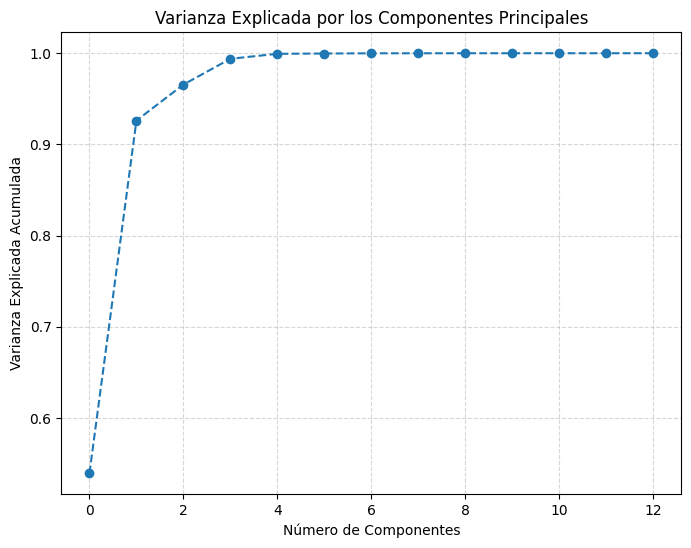

In [7]:

# Aplicar PCA con 13 componentes principales
pca2 = PCA(n_components=13)
pca2.fit(cereals_df2)

# Mostrar resumen de la varianza explicada
print("Varianza explicada por cada componente principal:")
print(pca2.explained_variance_ratio_)

# Matriz de rotación (componentes principales)
print("\nMatriz de rotación:")
print(pca2.components_)

# Obtener los scores de los primeros 5 datos
scores = pca2.transform(cereals_df2)
print("\nPrimeras 5 filas de los scores:")
print(scores[:5])

# Graficar la varianza explicada acumulada
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(pca2.explained_variance_ratio_), marker='o', linestyle='--')
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Explicada Acumulada')
plt.title('Varianza Explicada por los Componentes Principales')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [8]:
import pandas as pd

# Obtener las primeras 5 columnas de la matriz de rotación (componentes principales)
rot_1_5 = pca2.components_.T[:, :5]

# Crear un DataFrame con los nombres originales de las variables
rot_df = pd.DataFrame(rot_1_5, index=cereals_df2.columns, columns=[f'PC{i+1}' for i in range(5)])

# Mostrar la matriz de rotación formateada
print("Primeras 5 columnas de la matriz de rotación con nombres de variables:")
print(rot_df)

Primeras 5 columnas de la matriz de rotación con nombres de variables:
               PC1       PC2       PC3       PC4       PC5
calories  0.077984 -0.009312  0.629206 -0.601021  0.454959
protein  -0.000757  0.008801  0.001026  0.003200  0.056176
fat      -0.000102  0.002699  0.016196 -0.025262 -0.016098
sodium    0.980215  0.140896 -0.135902 -0.000968  0.013948
fiber    -0.005413  0.030681 -0.018191  0.020472  0.013605
carbo     0.017246 -0.016783  0.017370  0.025948  0.349267
sugars    0.002989 -0.000253  0.097705 -0.115481 -0.299066
potass   -0.134900  0.986562  0.036782 -0.042176 -0.047151
vitamins  0.094293  0.016729  0.691978  0.714118 -0.037009
shelf    -0.001541  0.004360  0.012489  0.005647 -0.007876
weight    0.000512  0.000999  0.003806 -0.002546  0.003022
cups      0.000510 -0.001591  0.000694  0.000985  0.002148
rating   -0.075296  0.071742 -0.307947  0.334534  0.757708


In [9]:
#Normalizamos los datos y volvemos a calcular el PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Normalizar los datos (media 0, desviación estándar 1)
scaler = StandardScaler()
cereals_df2_scaled = scaler.fit_transform(cereals_df2)

# Aplicar PCA con los datos normalizados
pca2 = PCA(n_components=13)
pca2.fit(cereals_df2_scaled)

# Obtener los scores (datos transformados)
scores = pca2.transform(cereals_df2_scaled)

# Mostrar la varianza explicada por cada componente
print("Varianza explicada por cada componente principal:")
print((pca2.explained_variance_ratio_).round(2))

# Matriz de rotación con nombres de variables
rot_df = pd.DataFrame(pca2.components_.T, index=cereals_df2.columns, columns=[f'PC{i+1}' for i in range(13)]).round(2)
print("\nMatriz de rotación:")
print(rot_df)

Varianza explicada por cada componente principal:
[0.28 0.24 0.15 0.08 0.08 0.06 0.05 0.03 0.02 0.01 0.   0.   0.  ]

Matriz de rotación:
           PC1   PC2   PC3   PC4   PC5   PC6   PC7   PC8   PC9  PC10  PC11  \
calories -0.30  0.39  0.11 -0.20  0.20 -0.26 -0.03 -0.00  0.03 -0.50 -0.21   
protein   0.31  0.17  0.28 -0.30  0.32  0.12  0.28 -0.43  0.53  0.02  0.03   
fat      -0.04  0.35 -0.20 -0.19  0.59  0.35 -0.05  0.06 -0.46  0.15 -0.07   
sodium   -0.18  0.14  0.39 -0.12 -0.34  0.66 -0.28  0.18  0.22  0.00 -0.09   
fiber     0.45  0.18  0.07 -0.04 -0.26  0.06  0.11  0.22 -0.24 -0.30 -0.53   
carbo    -0.19 -0.15  0.56 -0.09  0.18 -0.33 -0.26  0.17 -0.12 -0.24  0.18   
sugars   -0.23  0.35 -0.36  0.02 -0.31 -0.15  0.23 -0.06  0.23 -0.25 -0.00   
potass    0.40  0.30  0.07 -0.09 -0.15  0.03  0.15  0.26 -0.17 -0.18  0.73   
vitamins -0.12  0.17  0.39  0.60 -0.05  0.13  0.29 -0.46 -0.35 -0.05  0.02   
shelf     0.17  0.27 -0.00  0.64  0.33 -0.05 -0.17  0.41  0.42  0.05 -0.06   
weig

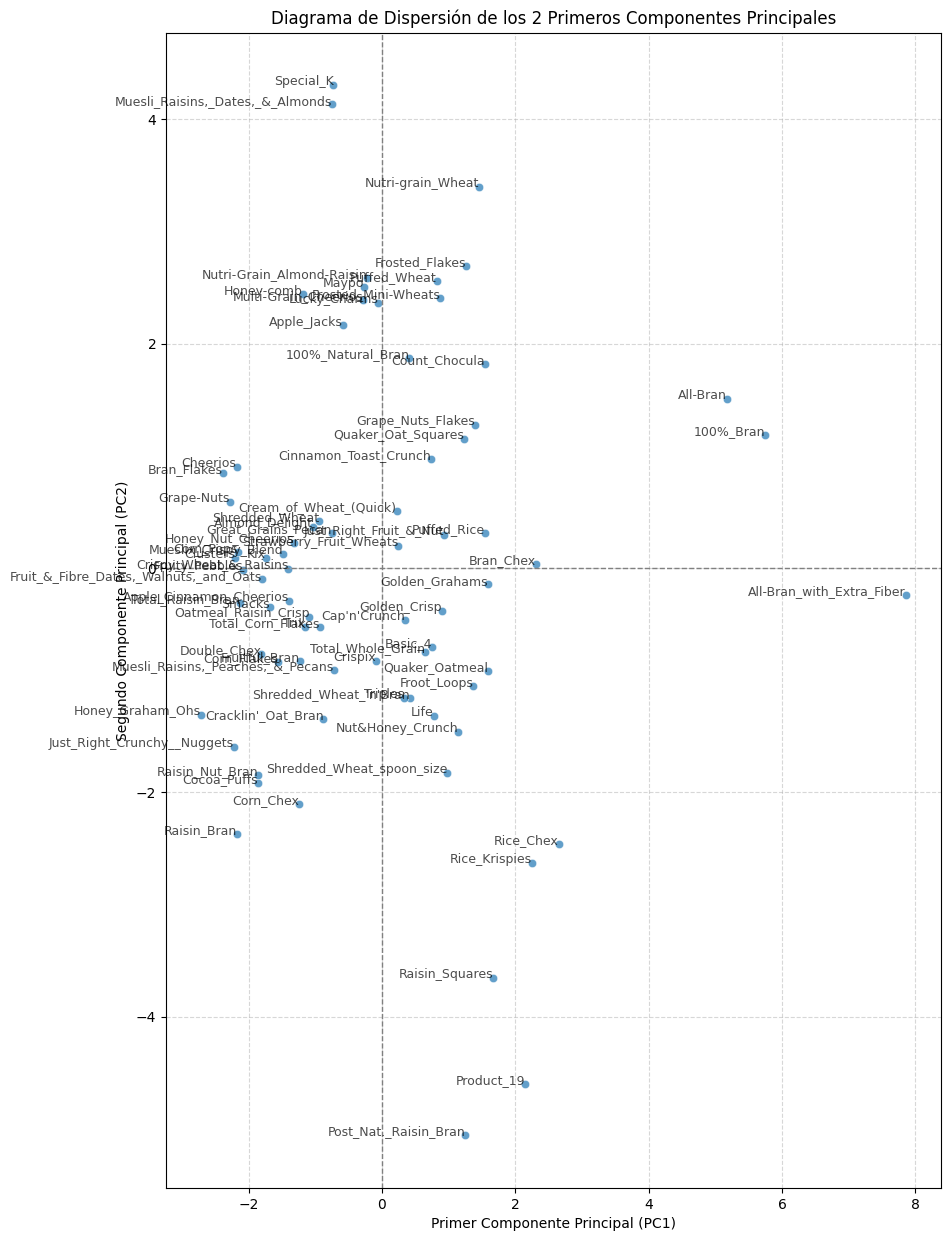

In [10]:
#Diagrama con etiquetas

scores_df = pd.DataFrame(scores, columns=[f'PC{i+1}' for i in range(13)])
scores_df['name'] = cereals_df2.index  # Agregar índice como etiquetas

# Graficar los dos primeros componentes principales con etiquetas
plt.figure(figsize=(10, 15))
sns.scatterplot(x=scores_df['PC1'], y=scores_df['PC2'], alpha=0.7)

# Agregar etiquetas a las observaciones
for i in range(scores_df.shape[0]):
    plt.text(scores_df['PC1'][i], scores_df['PC2'][i], str(cereals_df['name'][i]), 
             fontsize=9, ha='right', alpha=0.7)

# Personalizar gráfico
plt.xlabel('Primer Componente Principal (PC1)')
plt.ylabel('Segundo Componente Principal (PC2)')
plt.title('Diagrama de Dispersión de los 2 Primeros Componentes Principales')
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.axvline(0, color='gray', linestyle='--', linewidth=1)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()